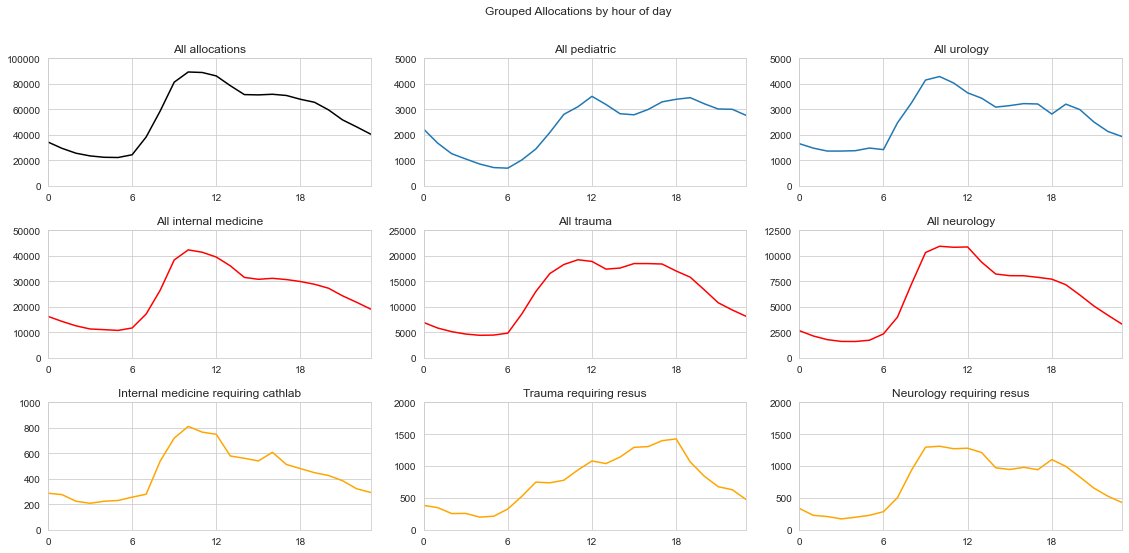

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/dgina23_usage_by_times.csv')
df_transposed = df.set_index('hour').transpose()

fig, axes = plt.subplots(3, 3, figsize = (16,8))

fig.suptitle('Grouped Allocations by hour of day')
fig.tight_layout(pad=2.5)

df_transposed['total'].plot(ax=axes[0,0], color="black", title="All allocations", xlim=[0,23], ylim=[0,100000], xticks=[0,6,12,18])
df_transposed['int'].plot(ax=axes[1,0], color="red", title="All internal medicine", xlim=[0,23], ylim=[0,50000], xticks=[0,6,12,18])
df_transposed['int_cathlab'].plot(ax=axes[2,0], color="orange", title="Internal medicine requiring cathlab", xlim=[0,23], ylim=[0,1000], xticks=[0,6,12,18])
df_transposed['trauma'].plot(ax=axes[1,1], color="red", title="All trauma", xlim=[0,23], ylim=[0,25000], xticks=[0,6,12,18])
df_transposed['trauma_resus'].plot(ax=axes[2,1], color="orange", title="Trauma requiring resus", xlim=[0,23], ylim=[0,2000], xticks=[0,6,12,18])
df_transposed['neuro'].plot(ax=axes[1,2], color="red", title="All neurology", xlim=[0,23], ylim=[0,12500], xticks=[0,6,12,18])
df_transposed['neuro_resus'].plot(ax=axes[2,2], color="orange", title="Neurology requiring resus", xlim=[0,23], ylim=[0,2000], xticks=[0,6,12,18])
df_transposed['peds'].plot(ax=axes[0,1], title="All pediatric", xlim=[0,23], ylim=[0,5000], xticks=[0,6,12,18])
df_transposed['urology'].plot(ax=axes[0,2], title="All urology", xlim=[0,23], ylim=[0,5000], xticks=[0,6,12,18])

plt.show();